In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline


import plotly
import plotly.express as px
import plotly.graph_objects as go

# //for size in pandas graph by matplotlib
plt.rcParams['figure.figsize']=20,12
,
# cufflinks: connects plotly with pandas so that we can create
# charts directly on data frames
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

# for maps
import folium

In [2]:
# connecting
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_excel(r'Covid cases in India.xlsx')
df

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0        1     Andhra Pradesh                                       12   
1        2       Chhattisgarh                                        6   
2        3              Delhi                                       38   
3        4            Gujarat                                       43   
4        5            Haryana                                       16   
5        6   Himachal Pradesh                                        4   
6        7          Karnataka                                       20   
7        8             Kerala                                      131   
8        9     Madhya Pradesh                                       23   
9       10        Maharashtra                                      144   
10      11             Odisha                                        3   
11      12         Puducherry                                        1   
12      13             Punjab                                       29   
13      14          Rajasthan                                       41   
14      15         Tamil Nadu                                       32   
15      16          Telengana                                       34   
16      17         Chandigarh                                        7   
17      18  Jammu and Kashmir                                       18   
18      19             Ladakh                                       13   
19      20      Uttar Pradesh                                       42   
20      21        Uttarakhand                                        4   
21      22        West Bengal                                       11   
22      23              Bihar                                        7   
23      24            Mizoram                                        1   
24      25                Goa                                        6   
25      26            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  
0                                            0      1      0  
1                                            0      0      0  
2                                            1      6      1  
3                                            0      0      3  
4                                           14     11      0  
5                                            0      0      1  
6                                            0      3      2  
7                                            7     11      0  
8                                            0      0      1  
9                                            3     15      4  
10                                           0      0      0  
11                                           0      0      0  
12                                           0      0      1  
13                                           2      3      0  
14                                           3      1      1  
15                                          11      1      0  
16                                           0      0      0  
17                                           0      1      1  
18                                           0      0      0  
19                                           1     11      0  
20                                           0      0      0  
21                                           0      0      1  
22                                           0      0      1  
23                                           0      0      0  
24                                           0      0      0  
25                                           0      0      0

In [4]:
df.drop(columns=['S. No.'],inplace=True)

In [5]:
df

Name of State / UT  Total Confirmed cases (Indian National)  \
0      Andhra Pradesh                                       12   
1        Chhattisgarh                                        6   
2               Delhi                                       38   
3             Gujarat                                       43   
4             Haryana                                       16   
5    Himachal Pradesh                                        4   
6           Karnataka                                       20   
7              Kerala                                      131   
8      Madhya Pradesh                                       23   
9         Maharashtra                                      144   
10             Odisha                                        3   
11         Puducherry                                        1   
12             Punjab                                       29   
13          Rajasthan                                       41   
14         Tamil Nadu                                       32   
15          Telengana                                       34   
16         Chandigarh                                        7   
17  Jammu and Kashmir                                       18   
18             Ladakh                                       13   
19      Uttar Pradesh                                       42   
20        Uttarakhand                                        4   
21        West Bengal                                       11   
22              Bihar                                        7   
23            Mizoram                                        1   
24                Goa                                        6   
25            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  
0                                            0      1      0  
1                                            0      0      0  
2                                            1      6      1  
3                                            0      0      3  
4                                           14     11      0  
5                                            0      0      1  
6                                            0      3      2  
7                                            7     11      0  
8                                            0      0      1  
9                                            3     15      4  
10                                           0      0      0  
11                                           0      0      0  
12                                           0      0      1  
13                                           2      3      0  
14                                           3      1      1  
15                                          11      1      0  
16                                           0      0      0  
17                                           0      1      1  
18                                           0      0      0  
19                                           1     11      0  
20                                           0      0      0  
21                                           0      0      1  
22                                           0      0      1  
23                                           0      0      0  
24                                           0      0      0  
25                                           0      0      0

In [6]:
df['Overall Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [7]:
df.head()

Name of State / UT  Total Confirmed cases (Indian National)  \
0     Andhra Pradesh                                       12   
1       Chhattisgarh                                        6   
2              Delhi                                       38   
3            Gujarat                                       43   
4            Haryana                                       16   

   Total Confirmed cases ( Foreign National )  Cured  Death  Overall Cases  
0                                           0      1      0             12  
1                                           0      0      0              6  
2                                           1      6      1             39  
3                                           0      0      3             43  
4                                          14     11      0             30

In [8]:
totalcasesoverall=df['Overall Cases'].sum()

In [9]:
print('Total cases in india till now : {}'.format(totalcasesoverall))

Total cases in india till now : 729


In [10]:
df['Active Cases']=df['Overall Cases']-df['Cured']-df['Death']
df

Name of State / UT  Total Confirmed cases (Indian National)  \
0      Andhra Pradesh                                       12   
1        Chhattisgarh                                        6   
2               Delhi                                       38   
3             Gujarat                                       43   
4             Haryana                                       16   
5    Himachal Pradesh                                        4   
6           Karnataka                                       20   
7              Kerala                                      131   
8      Madhya Pradesh                                       23   
9         Maharashtra                                      144   
10             Odisha                                        3   
11         Puducherry                                        1   
12             Punjab                                       29   
13          Rajasthan                                       41   
14         Tamil Nadu                                       32   
15          Telengana                                       34   
16         Chandigarh                                        7   
17  Jammu and Kashmir                                       18   
18             Ladakh                                       13   
19      Uttar Pradesh                                       42   
20        Uttarakhand                                        4   
21        West Bengal                                       11   
22              Bihar                                        7   
23            Mizoram                                        1   
24                Goa                                        6   
25            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  Overall Cases  \
0                                            0      1      0             12   
1                                            0      0      0              6   
2                                            1      6      1             39   
3                                            0      0      3             43   
4                                           14     11      0             30   
5                                            0      0      1              4   
6                                            0      3      2             20   
7                                            7     11      0            138   
8                                            0      0      1             23   
9                                            3     15      4            147   
10                                           0      0      0              3   
11                                           0      0      0              1   
12                                           0      0      1             29   
13                                           2      3      0             43   
14                                           3      1      1             35   
15                                          11      1      0             45   
16                                           0      0      0              7   
17                                           0      1      1             18   
18                                           0      0      0             13   
19                                           1     11      0             43   
20                                           0      0      0              4   
21                                           0      0      1             11   
22                                           0      0      1              7   
23                                           0      0      0              1   
24                                           0      0      0              6   
25                                           0      0      0              1   

    Active Cases  
0             11  
1              6  
2             32  
3         

In [11]:
df.style.background_gradient(cmap='Reds')

In [12]:
# seeing only two columns like state and active cases
# grouping of ccolumns
total_active_cases_statewise=df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False)

In [13]:
# to convert inot the datfarme
total_active_cases_statewise=total_active_cases_statewise.to_frame()

In [14]:
total_active_cases_statewise.style.background_gradient(cmap='Reds')

# GRAPHS

In [15]:
# BY PANDAS

<Axes: xlabel='Name of State / UT'>

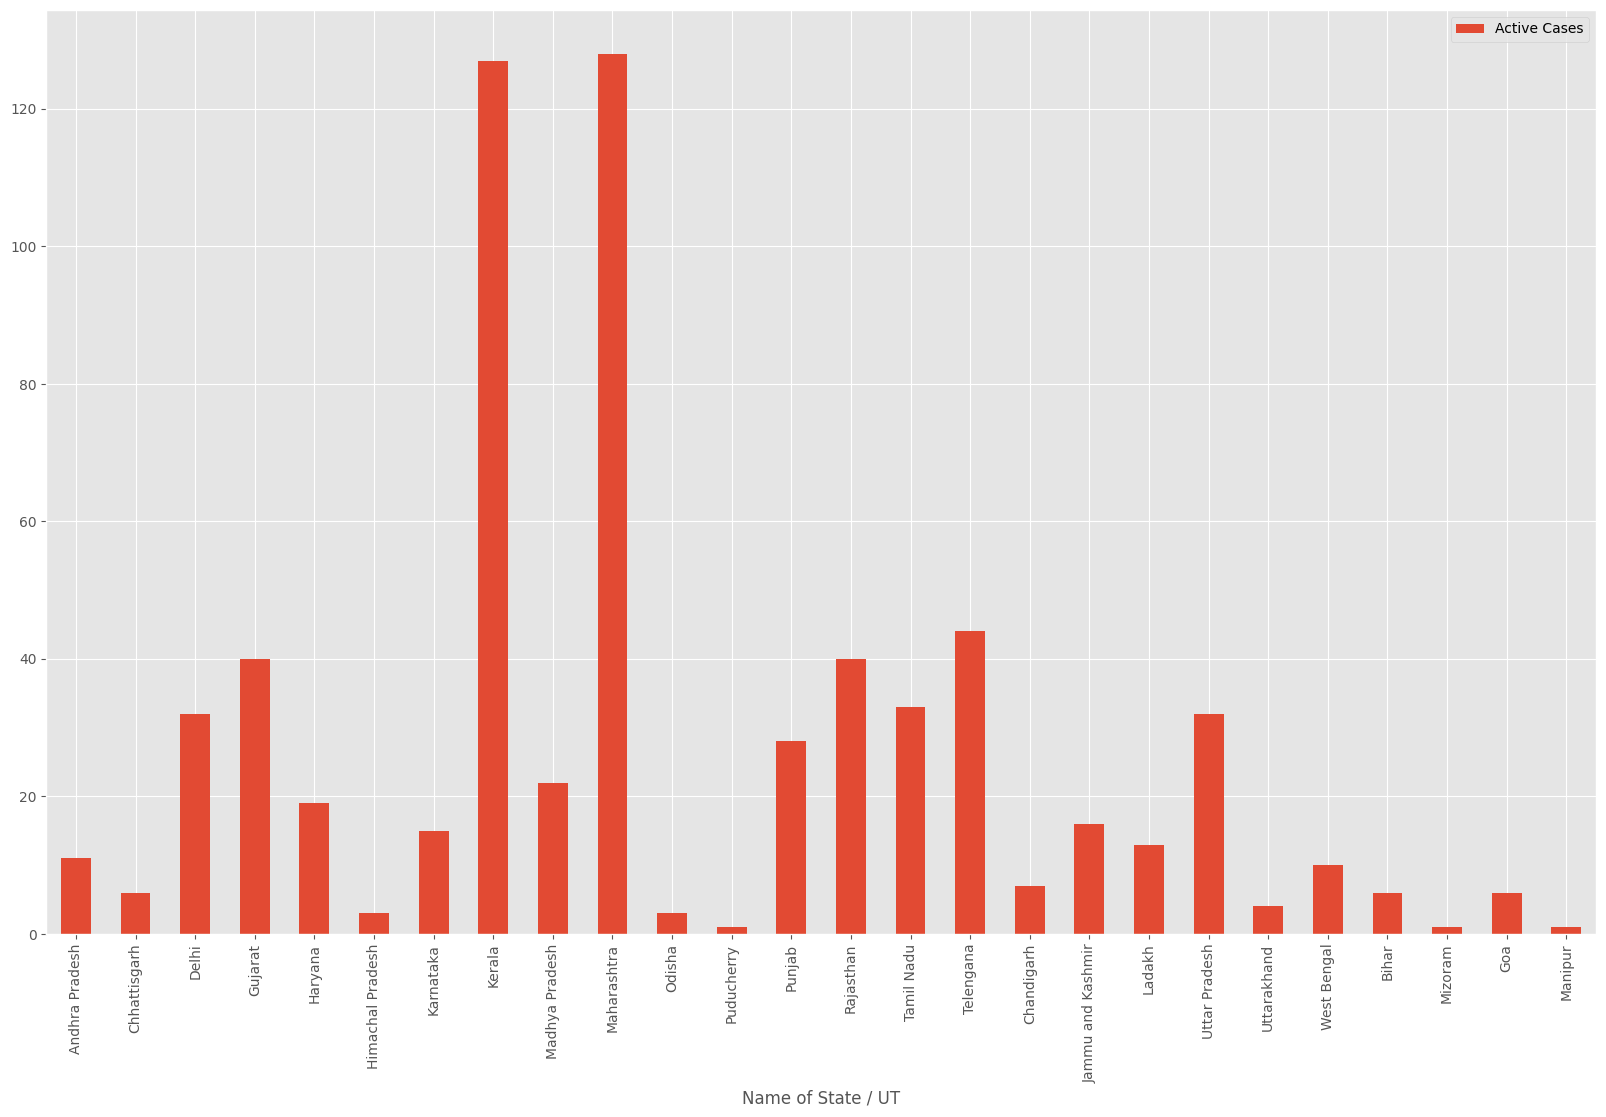

In [16]:
df.plot(kind='bar',x='Name of State / UT',y='Active Cases')

In [17]:
# by plotly
df.iplot(kind='bar',x='Name of State / UT',y='Active Cases')

In [18]:
# BY MATPLOTLIB

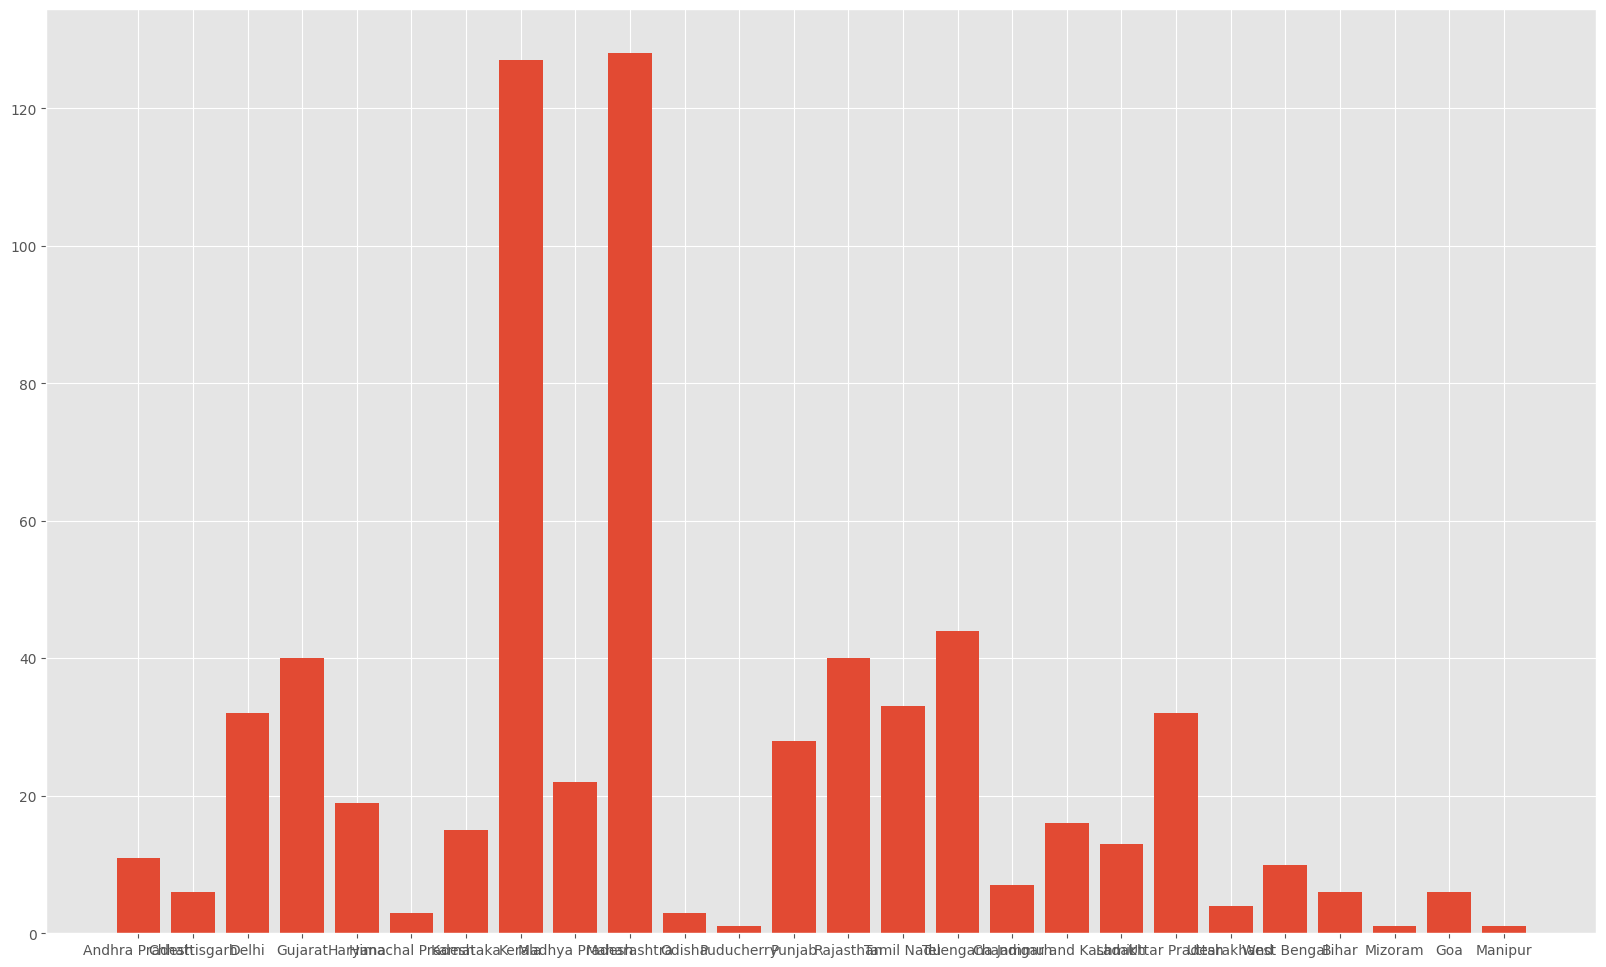

<Figure size 2000x2000 with 0 Axes>

In [19]:
plt.bar(df['Name of State / UT'],df['Active Cases'])
plt.figure(figsize=(20,20))
plt.show()

In [20]:
# plotly express
px.bar(df,x='Name of State / UT',y='Active Cases')


# STATEWISE

In [21]:
#by pandas
# df.plot(kind='scatter',x='Name of State / UT',y='Active Cases')

# by matplotlib
# plt.scatter(df['Name of State / UT'],df['Active Cases'])

#plotly
df.iplot(kind='scatter',x='Name of State / UT'
         ,y='Active Cases',mode='markers+lines'
        ,title='State vs Active cases',
        xTitle='States',
        yTitle='Active Cases',
        colors='Red',
        size=15)

In [22]:
px.scatter(df,x='Name of State / UT'
         ,y='Active Cases')

In [23]:
indiancoord=pd.read_excel('Indian Coordinates.xlsx')
indiancoord

Name of State / UT   Latitude  Longitude
0                   Andaman And Nicobar   11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                     Arunachal Pradesh   27.100399  93.616601
3                                 Assam   26.749981  94.216667
4                                 Bihar   25.785414  87.479973
5                            Chandigarh   30.719997  76.780006
6                          Chhattisgarh   22.090420  82.159987
7                Dadra And Nagar Haveli   20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                   Goa   15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                     Himachal Pradesh   31.100025  77.166597
12  Union Territory of Jammu and Kashmir  33.450000  76.240000
13                            Jharkhand   23.800393  86.419986
14                             Karnataka  12.570381  76.919997
15                                Kerala   8.900373  76.569993
16                          Lakshadweep   10.562573  72.636867
17                       Madhya Pradesh   21.300391  76.130019
18                           Maharashtra  19.250232  73.160175
19                              Manipur   24.799971  93.950017
20                            Meghalaya   25.570492  91.880014
21                              Mizoram   23.710399  92.720015
22                             Nagaland   25.666998  94.116570
23                               Orissa   19.820430  85.900017
24                           Puducherry   11.934994  79.830000
25                                Punjab  31.519974  75.980003
26                             Rajasthan  26.449999  74.639981
27                               Sikkim   27.333330  88.616647
28                             Telengana  18.112400  79.019300
29                            Tamil Nadu  12.920386  79.150042
30                              Tripura   23.835404  91.279999
31                         Uttar Pradesh  27.599981  78.050006
32                           Uttarakhand  30.320409  78.050006
33                          West Bengal   22.580390  88.329947
34             Union Territory of Ladakh  34.100000  77.340000

In [24]:
dffull=pd.merge(indiancoord,df,on='Name of State / UT')
dffull

Name of State / UT   Latitude  Longitude  \
0      Andhra Pradesh  14.750429  78.570026   
1               Delhi  28.669993  77.230004   
2             Haryana  28.450006  77.019991   
3           Karnataka  12.570381  76.919997   
4              Kerala   8.900373  76.569993   
5         Maharashtra  19.250232  73.160175   
6              Punjab  31.519974  75.980003   
7           Rajasthan  26.449999  74.639981   
8           Telengana  18.112400  79.019300   
9          Tamil Nadu  12.920386  79.150042   
10      Uttar Pradesh  27.599981  78.050006   
11        Uttarakhand  30.320409  78.050006   

    Total Confirmed cases (Indian National)  \
0                                        12   
1                                        38   
2                                        16   
3                                        20   
4                                       131   
5                                       144   
6                                        29   
7                                        41   
8                                        34   
9                                        32   
10                                       42   
11                                        4   

    Total Confirmed cases ( Foreign National )  Cured  Death  Overall Cases  \
0                                            0      1      0             12   
1                                            1      6      1             39   
2                                           14     11      0             30   
3                                            0      3      2             20   
4                                            7     11      0            138   
5                                            3     15      4            147   
6                                            0      0      1             29   
7                                            2      3      0             43   
8                                           11      1      0             45   
9                                            3      1      1             35   
10                                           1     11      0             43   
11                                           0      0      0              4   

    Active Cases  
0             11  
1             32  
2             19  
3             15  
4            127  
5            128  
6             28  
7             40  
8             44  
9             33  
10            32  
11             4

In [25]:
map=folium.Map(location=[20,70],zoom_start=4,titles='Stamenterrain')
for lat,lon,value,name in zip(dffull['Latitude'],dffull['Longitude'],dffull['Overall Cases'],dffull['Name of State / UT']):
    folium.CircleMarker([lat,lon],radius=value*0.3,popup=('<strong>State</strong>:'+str(name).capitalize()+'<br>'+'<strong>Total Cases</strong>: '+str(value)+'<br>'),fill_color='red',color='red',fill_opacity=0.2).add_to(map)
    

In [26]:
map

In [27]:
dbindia=pd.read_excel(r'per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbitaly=pd.read_excel(r'per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbkorea=pd.read_excel(r'per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbwuhan=pd.read_excel(r'per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [28]:
# ANALYSIS

In [29]:
dbindia.head()

Date  Total Cases  New Cases  Days after surpassing 100 cases
0 2020-01-30            1          1                              NaN
1 2020-01-31            1          0                              NaN
2 2020-02-01            1          0                              NaN
3 2020-02-02            2          1                              NaN
4 2020-02-03            3          1                              NaN

In [30]:
fig=px.bar(dbindia,x='Date',y='Total Cases',color='Total Cases',title='Daily cases in India')
fig.show()

In [94]:
fig=px.bar(dbkorea,x='Date',y='Total Cases',color='Total Cases',title='Daily cases in Korea')
fig.show()

In [95]:
fig=px.bar(dbwuhan,x='Date',y='Total Cases',color='Total Cases',title='Daily cases in Wuhan')
fig.show()

In [96]:
fig=px.bar(dbitaly,x='Date',y='Total Cases',color='Total Cases',title='Daily cases in Italy')
fig.show()

In [34]:
fig=px.scatter(dbindia,x='Date',y='Total Cases',color='Total Cases',title='Daily cases in India')
fig.show()

In [35]:
dbindia.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [36]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbindia['Date'],y=dbindia['Total Cases'],mode='lines+markers'))

# SUBPLOTS

In [37]:
from plotly.subplots import make_subplots

In [100]:
fig=make_subplots(rows=2,cols=2,
 specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
 subplot_titles=('S.Korea','India','Italy','Wuhan'))

In [101]:
fig.add_trace(go.Bar(x=dbkorea['Date'],y=dbkorea['Total Cases'],
                    marker=dict(color=dbkorea['Total Cases'],coloraxis='coloraxis')),1,1)
fig.add_trace(go.Bar(x=dbindia['Date'],y=dbindia['Total Cases'],
                    marker=dict(color=dbindia['Total Cases'],coloraxis='coloraxis')),1,2)
fig.add_trace(go.Bar(x=dbitaly['Date'],y=dbitaly['Total Cases'],
                    marker=dict(color=dbitaly['Total Cases'],coloraxis='coloraxis')),2,1)
fig.add_trace(go.Bar(x=dbwuhan['Date'],y=dbwuhan['Total Cases'],
                    marker=dict(color=dbwuhan['Total Cases'],coloraxis='coloraxis')),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title='Total Cases in 4 Countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [104]:
fig.add_trace(go.Scatter(x=dbkorea['Date'],y=dbkorea['Total Cases'],
                    marker=dict(color=dbkorea['Total Cases'],coloraxis='coloraxis')),1,1)
fig.add_trace(go.Scatter(x=dbindia['Date'],y=dbindia['Total Cases'],
                    marker=dict(color=dbindia['Total Cases'],coloraxis='coloraxis')),1,2)
fig.add_trace(go.Scatter(x=dbitaly['Date'],y=dbitaly['Total Cases'],
                    marker=dict(color=dbitaly['Total Cases'],coloraxis='coloraxis')),2,1)
fig.add_trace(go.Scatter(x=dbwuhan['Date'],y=dbwuhan['Total Cases'],
                    marker=dict(color=dbwuhan['Total Cases'],coloraxis='coloraxis')),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title='Total Cases in 4 Countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [43]:
# world map
world=pd.read_csv(r'covid_19_data.csv',parse_dates=['Last Update'])
# changes date format
world.head()

SNo ObservationDate Province/State  Country/Region         Last Update  \
0    1      01/22/2020          Anhui  Mainland China 2020-01-22 17:00:00   
1    2      01/22/2020        Beijing  Mainland China 2020-01-22 17:00:00   
2    3      01/22/2020      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4      01/22/2020         Fujian  Mainland China 2020-01-22 17:00:00   
4    5      01/22/2020          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [49]:
world.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [55]:
# world

In [56]:
world.query('Country=="UK"').head()

SNo        Date Province/State Country         Last Update  Confirmed  \
481  482  01/31/2020            NaN      UK 2020-01-31 23:59:00        2.0   
541  542  02/01/2020            NaN      UK 2020-02-01 01:52:00        2.0   
611  612  02/02/2020            NaN      UK 2020-02-01 01:52:40        2.0   
678  679  02/03/2020            NaN      UK 2020-02-01 01:52:40        2.0   
746  747  02/04/2020            NaN      UK 2020-02-01 01:52:40        2.0   

     Deaths  Recovered  
481     0.0        0.0  
541     0.0        0.0  
611     0.0        0.0  
678     0.0        0.0  
746     0.0        0.0

In [58]:
world.groupby('Date').sum().head()

C:\Users\User\AppData\Local\Temp\ipykernel_15600\3531787879.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



SNo  Confirmed  Deaths  Recovered
Date                                          
01/22/2020   741      555.0    17.0       28.0
01/23/2020  2829      653.0    18.0       30.0
01/24/2020  4305      941.0    26.0       36.0
01/25/2020  6490     1438.0    42.0       39.0
01/26/2020  9071     2118.0    56.0       52.0

In [67]:
confirmed=world.groupby('Date').sum()['Confirmed'].reset_index()
death=world.groupby('Date').sum()['Deaths'].reset_index()
recovered=world.groupby('Date').sum()['Recovered'].reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_15600\1119699240.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\User\AppData\Local\Temp\ipykernel_15600\1119699240.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\User\AppData\Local\Temp\ipykernel_15600\1119699240.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [106]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],
mode='lines+markers',name='Confirmed',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],
mode='lines+markers',name='Death',line=dict(color='red')))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],
mode='lines+markers',name='Recovered',line=dict(color='green')))


In [83]:
worldconfirm=pd.read_csv(r'time_series_covid_19_confirmed.csv')
worldconfirm.rename(columns={'Country/Region':'Country'},inplace=True)

In [86]:
dflatlong=pd.merge(world,worldconfirm,on=['Country','Province/State'])
dflatlong.head()

SNo        Date Province/State Country         Last Update  Confirmed  \
0   32  01/22/2020     Washington      US 2020-01-22 17:00:00        1.0   
1   70  01/23/2020     Washington      US 2020-01-23 17:00:00        1.0   
2  118  01/24/2020     Washington      US 2020-01-24 17:00:00        1.0   
3  159  01/25/2020     Washington      US 2020-01-25 17:00:00        1.0   
4  203  01/26/2020     Washington      US 2020-01-26 16:00:00        1.0   

   Deaths  Recovered      Lat      Long  ...  3/5/20  3/6/20  3/7/20  3/8/20  \
0     0.0        0.0  47.4009 -121.4905  ...       0       0       0       0   
1     0.0        0.0  47.4009 -121.4905  ...       0       0       0       0   
2     0.0        0.0  47.4009 -121.4905  ...       0       0       0       0   
3     0.0        0.0  47.4009 -121.4905  ...       0       0       0       0   
4     0.0        0.0  47.4009 -121.4905  ...       0       0       0       0   

   3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
0       0      267      366      442      568      572  
1       0      267      366      442      568      572  
2       0      267      366      442      568      572  
3       0      267      366      442      568      572  
4       0      267      366      442      568      572  

[5 rows x 63 columns]

In [93]:
fig=px.density_mapbox(dflatlong,lat='Lat',lon='Long',hover_name='Province/State',
hover_data=['Confirmed','Deaths','Recovered'],
animation_frame='Date',color_continuous_scale='Portland',
radius=7,zoom=4,height=700)

fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style='open-street-map',mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})